In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import gc

from datetime import datetime

sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)  

%matplotlib inline

In [2]:
df = pd.read_csv('../Data/Kaggle/KDDCup14/data_consolidation.csv')

In [3]:
df.shape

(664098, 81)

In [4]:
df.columns

Index(['projectid', 'teacher_acctid', 'school_latitude', 'school_longitude',
       'school_metro', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area',
       'resource_type', 'poverty_level', 'grade_level',
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'qtd_projects', 'is_exciting', 'mean_is_exciting',
       'mean_at_least_1_teacher_referred_donor', 'mean_fully_funded',
       'mean_at_least_1_green_donation', 'mean_great_chat',
       'mean_one_non_teacher_referred_donor_giving_100_plus',
       'mean_donation_from_thoughtf

In [5]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df = df[(df['date_posted'].dt.year > 2009) & (df['date_posted'].dt.year < 2014)]

len(df)

439599

In [13]:
df['date_posted'].min()

Timestamp('2010-01-01 00:00:00')

In [14]:
df['date_posted'].max()

Timestamp('2013-12-31 00:00:00')

### Análise Geral

#### Missing Values

In [6]:
def plotNull(df, exclude='object'):
    df = df.select_dtypes(exclude=exclude)
    df_null = df.isnull().sum() / len(df)
    df_null.sort_values(inplace=True)
    df_null.plot.barh(figsize=(10, 15), xlim=(0,1), 
                      title='Percentual of "Missing Values" (%)')

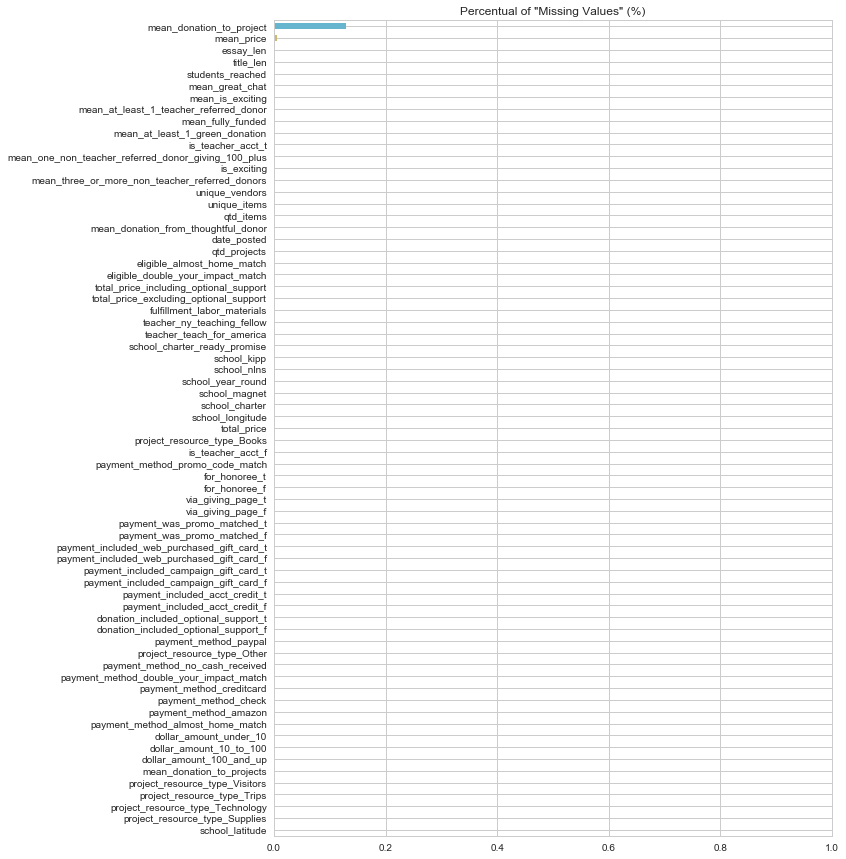

In [7]:
plotNull(df)

#### Target

In [8]:
df['is_exciting'].value_counts()

0.0    402889
1.0     36710
Name: is_exciting, dtype: int64

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


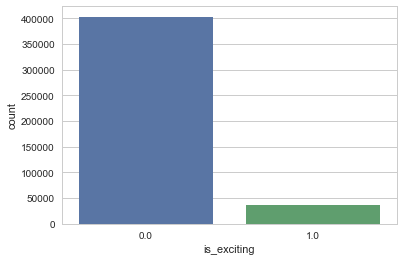

In [9]:
sns.countplot(x='is_exciting', data=df)

### Time Analysis

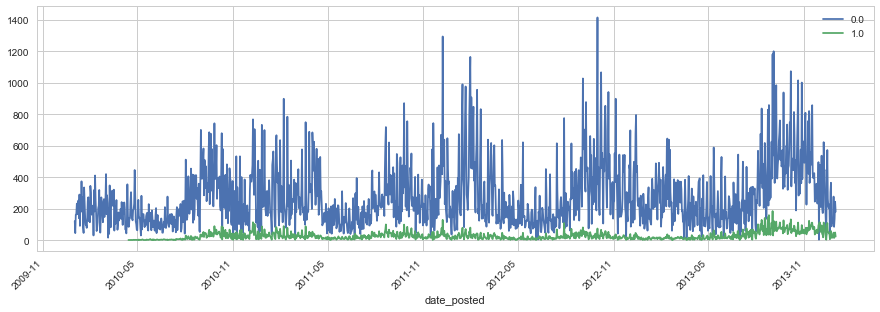

In [10]:
plt.figure(figsize=(15, 5))

for key, grp in df.groupby(['is_exciting']): 
    grp.groupby('date_posted')['projectid'].size().plot(figsize=(15, 5), rot=45, kind='line', label=key)
plt.legend();

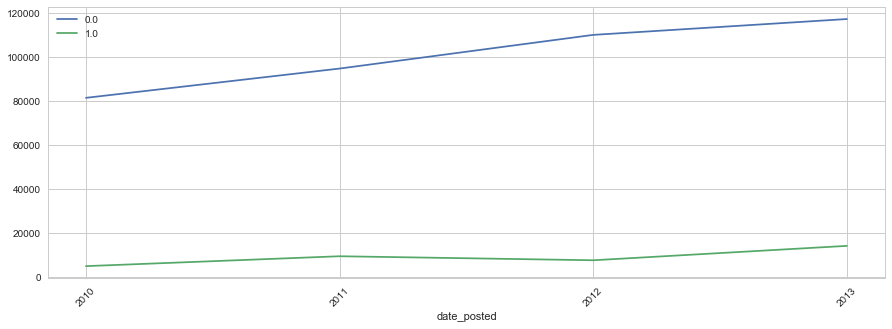

In [16]:
plt.figure(figsize=(15, 5))

per = df['date_posted'].dt.to_period("Y")
for key, grp in df.groupby(['is_exciting']): 
    grp.groupby(per).size().plot(figsize=(15, 5), rot=45, kind='line', label=key)
plt.legend();

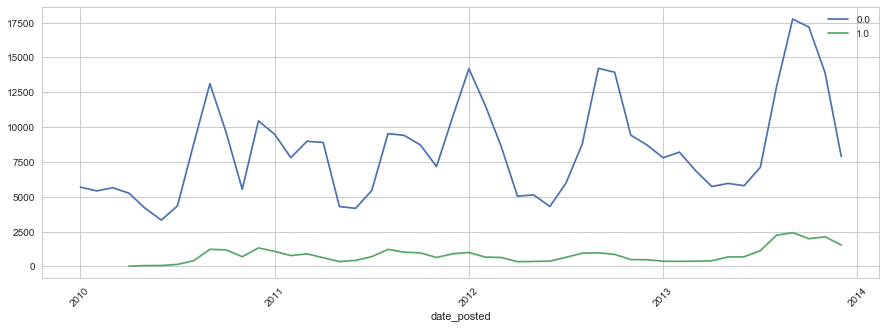

In [15]:
plt.figure(figsize=(15, 5))

per = df['date_posted'].dt.to_period("M")
for key, grp in df.groupby(['is_exciting']): 
    grp.groupby(per).size().plot(figsize=(15, 5), rot=45, kind='line', label=key)
plt.legend();

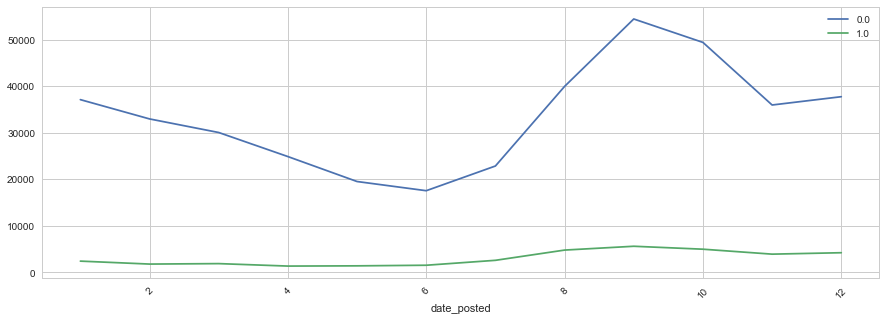

In [18]:
plt.figure(figsize=(15, 5))

per = df['date_posted'].dt.month
for key, grp in df.groupby(['is_exciting']): 
    grp.groupby(per).size().plot(figsize=(15, 5), rot=45, kind='line', label=key)
plt.legend();

### Distributions

#### Idade

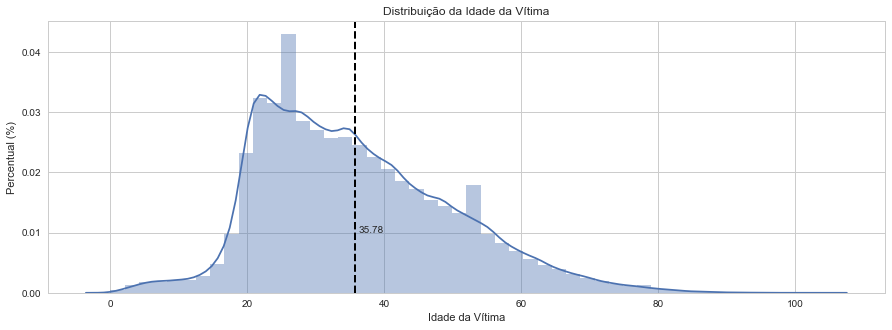

In [12]:
plt.figure(figsize=(15, 5))
sns.distplot(df['Idade da Vítima'], rug=False)
#plt.axvline(df['Idade da Vítima'].min(),  color='g', linestyle='dashed', linewidth=2)
#plt.axvline(df['Idade da Vítima'].max(),  color='r', linestyle='dashed', linewidth=2)
h = df['Idade da Vítima'].mean()
#plt.axvline(df['Idade da Vítima'].max(),  color='r', linestyle='dashed', linewidth=2)
plt.axvline(h, color='k', linestyle='dashed', linewidth=2)
plt.annotate('{0:.2f}'.format(h),xy=(h+0.5, 0.01))
plt.title('Distribuição da Idade da Vítima')
plt.ylabel('Percentual (%)')

#### Sexo da Vítima

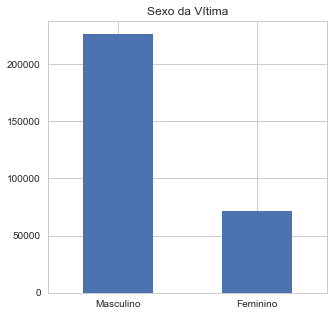

In [13]:
df['Sexo da Vítima'].value_counts().plot.bar(figsize=(5, 5), 
                                              title='Sexo da Vítima',
                                            rot='horizontal')

In [14]:
df['Descrição do Sinistrado'].value_counts(normalize=True)

3 - Motorista           0.722175
1 - Transportado        0.160506
2 - Não Transportado    0.117319
Name: Descrição do Sinistrado, dtype: float64

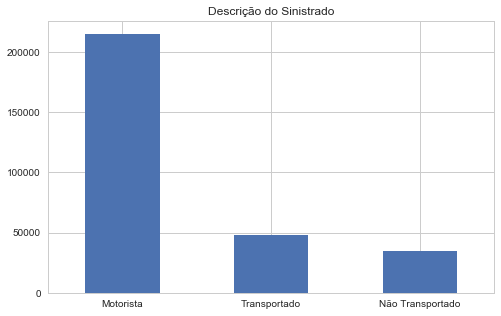

In [15]:
ax = df['Descrição do Sinistrado'].value_counts().plot.bar(figsize=(8, 5), 
                                              title='Descrição do Sinistrado',
                                            rot='horizontal')
ax.set_xticklabels(['Motorista','Transportado','Não Transportado'])

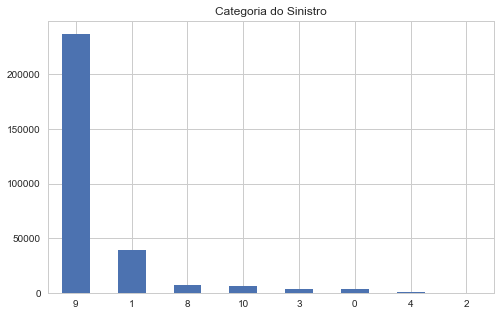

In [16]:
ax = df['Categoria do Sinistro'].value_counts().plot.bar(figsize=(8, 5), 
                                              title='Categoria do Sinistro',
                                            rot='horizontal')


In [17]:
df['Sexo da Vítima'].value_counts(normalize=True)

Masculino    0.759718
Feminino     0.240282
Name: Sexo da Vítima, dtype: float64

In [18]:
df[(df['Idade da Vítima'] > 25) & (df['Idade da Vítima'] < 45) & 
  (df['Sexo da Vítima'] == 'Masculino')].shape[0]/len(df)

0.3664762992575671

#### Evolução temporal

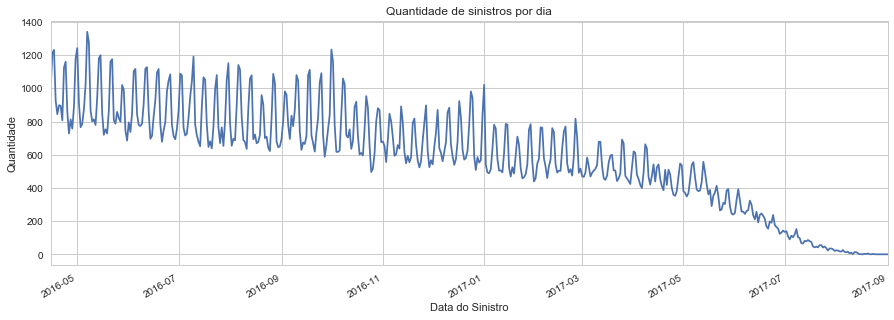

In [19]:
ax = df.groupby('Data do Sinistro')['Número do Sinistro']\
            .size().plot(figsize=(15, 5),kind='line', 
                         title='Quantidade de sinistros por dia')
ax.set_ylabel("Quantidade")

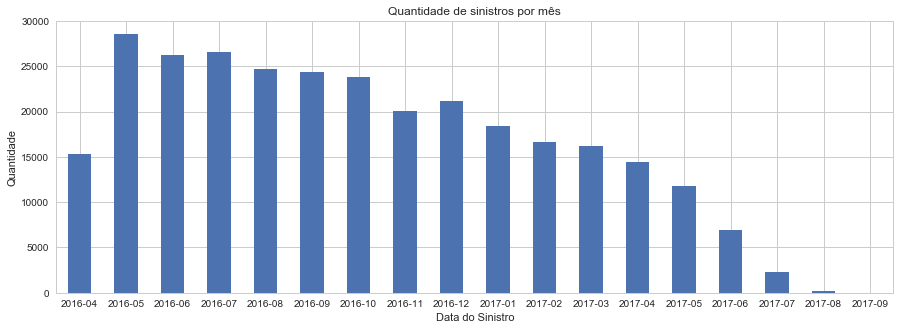

In [20]:
per = df['Data do Sinistro'].dt.to_period("M")
ax = df.groupby(per).size().plot.bar(figsize=(15, 5), 
                                     title='Quantidade de sinistros por mês',
                                    rot='horizontal')
ax.set_ylabel('Quantidade')

(30000, 56689.5)

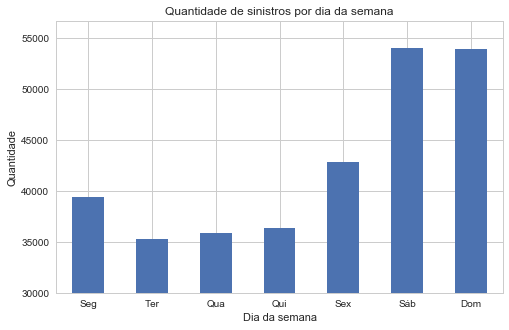

In [21]:
%matplotlib inline 
per = df['Data do Sinistro'].dt.dayofweek
ax = df.groupby(per).size().plot.bar(figsize=(8, 5), 
                                 title='Quantidade de sinistros por dia da semana',
                                 rot='horizontal')
ax.set_xticklabels(['Seg','Ter','Qua','Qui','Sex','Sáb','Dom'])
ax.set_ylabel('Quantidade')
ax.set_xlabel('Dia da semana')
ax.set_ylim(30000,)

#### Intervalos de tempo

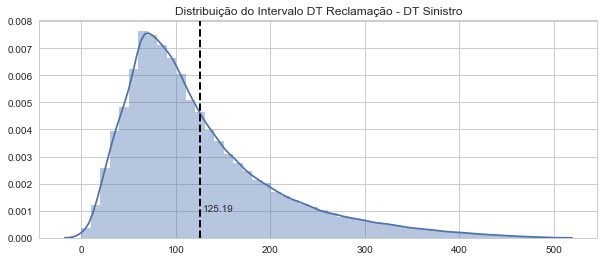

In [22]:
plt.figure(figsize=(10, 4))
a = df[pd.notnull(df['DT Reclamação-Sinistro'])]['DT Reclamação-Sinistro']
sns.distplot(a)
h = a.mean()
plt.axvline(h, color='k', linestyle='dashed', linewidth=2)
plt.annotate('{0:.2f}'.format(h),xy=(h+3, 0.001))
plt.title('Distribuição do Intervalo DT Reclamação - DT Sinistro')
plt.xlabel('')

In [23]:
df[df.index == 12964]

,Número do Sinistro,ATVCOD,Data do Sinistro,Hora do Sinistro,Seguradora/Reguladora,Pleito Pretendido,Nome da Vítima,CPF da Vítima,Sexo da Vítima,Descrição do Sinistrado,Categoria do Sinistro,Tipo do Documento,Nome do Médico,CRM do Médico,Município da Ocorrência do Sinistro,UF do Município da Ocorrência do Sinistro,UF do CRM do Médico,Valor da Perícia,Valor de AMD,Placa,UF da Placa,CPF da Vítima Válido,Idade da Vítima,# Relatorios,# Medico examinador,# Prestador,# Com sequela,# Sem sequela,# Em tratamento,# Não definido,# Sequela não indenizável,Avg % de perda,Std % de perda,Avg % apurado,Std % apurado,Avg Indenização pelo dano,Std Indenização pelo dano,# tot Placa,# tot CPF/Vítima,DT Reclamação-Sinistro,DT Boletim-Sinistro,DT Perícia-Sinistro,DT Data de Realização da AMD-Sinistro,Tem RelatórioPM,# Pessoa Relacionada ao Sinistro,# distinct Pessoa Relacionada ao Sinistro,# Pessoa Física,# Pessoa Jurídica,% Pessoa Jurídica,# Beneficiário,# Procurador,# Representante Legal,Max Valor Pago a Esta Pessoa,# Parentes Relacionados ao Sinistro,# CPF CNPJ Inválido,# tot Telefone Ñ Beneficiário,# tot Telefone Beneficiário,# tot Conta Ñ Beneficiário,# tot Conta Beneficiário,# tot CRM do Médico,# tot CNPJ Ñ Beneficiário,# tot CNPJ Beneficiário,# tot CPF/PF Ñ Beneficiário,# tot CPF/PF Beneficiário,# tot Sinistros CPF/PF Ñ Beneficiário,# tot Sinistros CPF/PF Beneficiário,Existe UF PREL != Sinistro,Existe UF PREL != Delegacia,CRM Válido,UF Placa/Sequencia,Validez UF Placa,Qtd Sinistros,Qtd Veiculos,Proporção,Marcação
12964,3160477767,801146226,2016-05-23,10,fairfax brasil seguros corporativos s.a.,NaN,PEDRO HENRIQUE GAVIOLI FONSECA,08947982601,Masculino,3 - Motorista,1,"UF/PLACA a partir de 14/07/1992, pago antes do...",MARCELO DE ANDRADE GRIJO,NaN,JUIZ DE FORA,MG,NaN,NaN,NaN,HOF1840,MG,True,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,70,-366.0,NaN,NaN,False,2,2,2,0,0.0,True,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,11.0,1.0,False,False,False,NaN,UF Diferente,1554.0,249745.888889,0.006222,NaN


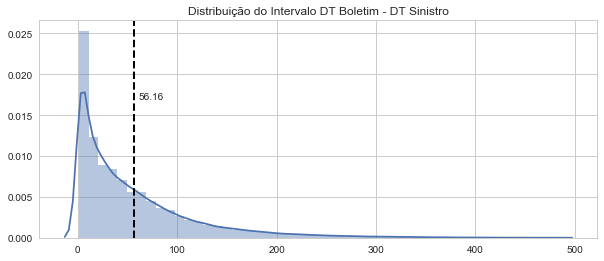

In [24]:
plt.figure(figsize=(10, 4))
a = df[(df['DT Boletim-Sinistro'] > 0) & 
   (df['DT Boletim-Sinistro'].notnull())]['DT Boletim-Sinistro']
sns.distplot(a)
h = a.mean()
plt.axvline(h, color='k', linestyle='dashed', linewidth=2)
plt.annotate('{0:.2f}'.format(h),xy=(h+5, 0.017))
plt.title('Distribuição do Intervalo DT Boletim - DT Sinistro')
plt.xlabel('')

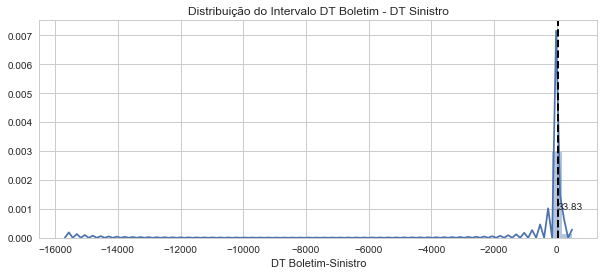

In [25]:
plt.figure(figsize=(10, 4))
a = df[pd.notnull(df['DT Boletim-Sinistro'])]['DT Boletim-Sinistro']
sns.distplot(a)
h = a.mean()
plt.axvline(h, color='k', linestyle='dashed', linewidth=2)
plt.annotate('{0:.2f}'.format(h),xy=(h+3, 0.001))
plt.title('Distribuição do Intervalo DT Boletim - DT Sinistro')

In [26]:
'Porcentagem negativa: {0:.3f}'.format((a < 0).sum()/len(a))

'Porcentagem negativa: 0.002'

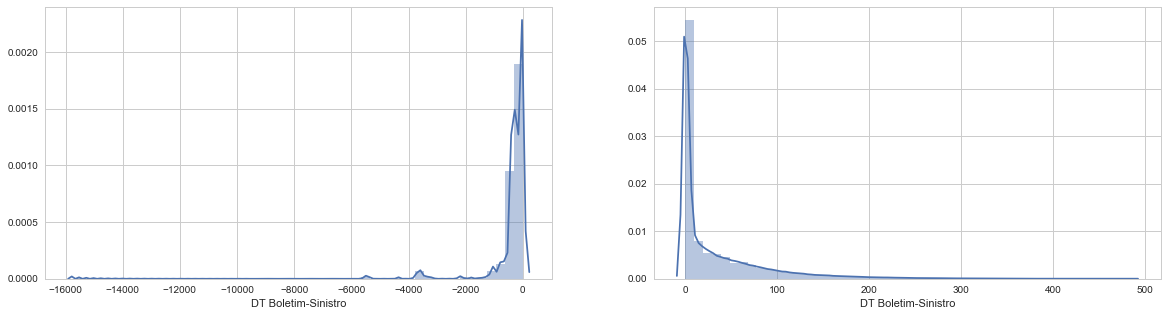

In [27]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))
a = df[pd.notnull(df['DT Boletim-Sinistro'])]['DT Boletim-Sinistro']
b = a[a >= 0]
a = a[a < 0]
sns.distplot(a, ax=axes[0])
sns.distplot(b, ax=axes[1])

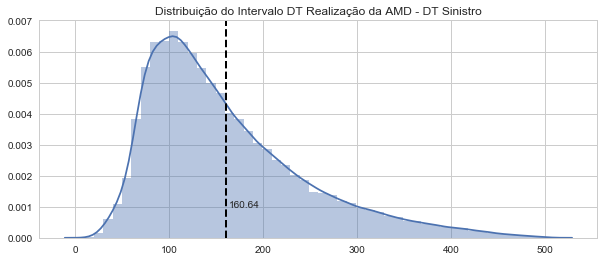

In [28]:
plt.figure(figsize=(10, 4))
a = df[pd.notnull(df['DT Data de Realização da AMD-Sinistro'])]['DT Data de Realização da AMD-Sinistro']
sns.distplot(a)
h = a.mean()
plt.axvline(h, color='k', linestyle='dashed', linewidth=2)
plt.annotate('{0:.2f}'.format(h),xy=(h+3, 0.001))
plt.title('Distribuição do Intervalo DT Realização da AMD - DT Sinistro')
plt.xlabel('')

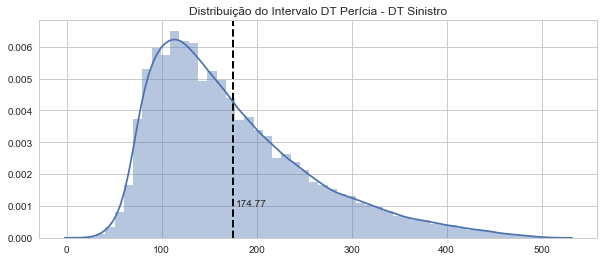

In [29]:
plt.figure(figsize=(10, 4))
a = df[pd.notnull(df['DT Perícia-Sinistro'])]['DT Perícia-Sinistro']
sns.distplot(a)
h = a.mean()
plt.axvline(h, color='k', linestyle='dashed', linewidth=2)
plt.annotate('{0:.2f}'.format(h),xy=(h+3, 0.001))
plt.title('Distribuição do Intervalo DT Perícia - DT Sinistro')
plt.xlabel('')

Exceto pela *DT Boletim-Sinistro*, as outras variáveis de data apresentam distribuição semelhante, com média de dias entre 100 e 200.

#### Horário do Sinistro

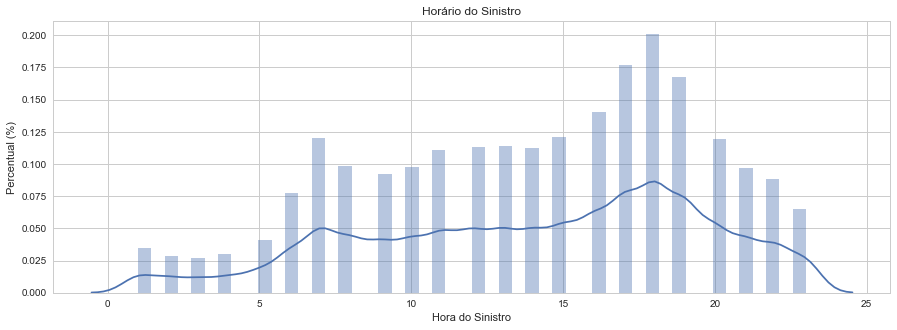

In [30]:
plt.figure(figsize=(15, 5))
ax = sns.distplot(df[df['Hora do Sinistro'] > 0]['Hora do Sinistro'])
plt.title('Horário do Sinistro')
ax.set_ylabel('Percentual (%)')

In [31]:
per.value_counts()

5    53990
6    53901
4    42856
0    39449
3    36348
2    35884
1    35242
Name: Data do Sinistro, dtype: int64

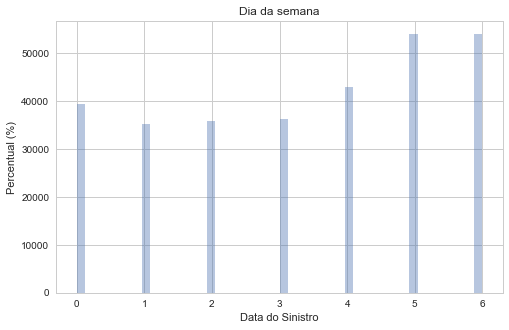

In [32]:
per = df['Data do Sinistro'].dt.dayofweek
plt.figure(figsize=(8, 5))
ax = sns.distplot(per, kde=False)
plt.title('Dia da semana')
ax.set_ylabel('Percentual (%)')
#ax.set_ylim(0.9,)

### Gráfico de Barras

In [33]:
df['Validez UF Placa'].value_counts()

Invalido            227065
UF Diferente         33534
OK                   32879
Não Identificada      4192
Name: Validez UF Placa, dtype: int64

In [34]:
df[df['Validez UF Placa'] == 'Não Identificada']['Placa'].value_counts()

ZZZ0000    4087
AAA9999     105
Name: Placa, dtype: int64

In [35]:
df[df['Validez UF Placa'] == 'Invalido']['Placa'].value_counts()[:50]

SP         133
XXX0000     94
MG          77
RS          75
CE          62
RJ          55
PE          50
PR          49
ZZZ9999     47
SC          40
GO          39
RO          26
PA          23
AM          20
MA          19
ES          17
BA          17
RN          15
PI          13
TO          13
MS          11
AAA0000     10
AP          10
AL           9
MT           6
PB           5
DF           5
SE           4
RR           3
SZZ0000      2
RDL5527      1
UFL7860      1
QVY9714      1
SIR8330      1
RVI2184      1
SIZ9128      1
RSB0793      1
02           1
SAC7864      1
UNO0685      1
UML4724      1
UJV9150      1
RCZ1090      1
RBI5896      1
RIJ3078      1
UZH5239      1
XHN8547      1
RPR3255      1
SVX3264      1
QVD9712      1
Name: Placa, dtype: int64

In [36]:
(df['Validez UF Placa'] == 'UF Diferente').sum()/len(df), (df['Validez UF Placa'] == 'UF Diferente').sum()

(0.11265495347196559, 33534)

In [37]:
(df['Validez UF Placa'] == 'OK').sum()/len(df), (df['Validez UF Placa'] == 'OK').sum()

(0.11045453018443242, 32879)

In [38]:
df['Validez UF Placa'].value_counts()

Invalido            227065
UF Diferente         33534
OK                   32879
Não Identificada      4192
Name: Validez UF Placa, dtype: int64

In [39]:
df[df['Validez UF Placa'] == 'Não Identificada']['Placa'].value_counts()

ZZZ0000    4087
AAA9999     105
Name: Placa, dtype: int64

In [40]:
df[df['Placa'].isin(['ZZZ0000','AAA9999'])].shape

(4192, 75)

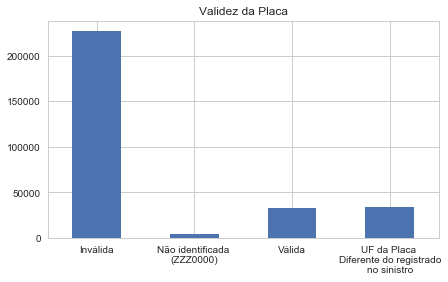

In [41]:
plt.figure(figsize=(7,4))
ax = df.groupby(['Validez UF Placa'])['Validez UF Placa'].size()\
        .plot.bar(rot='horizontal', title='Validez da Placa')
ax.set_xlabel('')
ax.set_xticklabels(['Inválida','Não identificada \n(ZZZ0000)','Válida',
                    'UF da Placa \nDiferente do registrado\nno sinistro'])

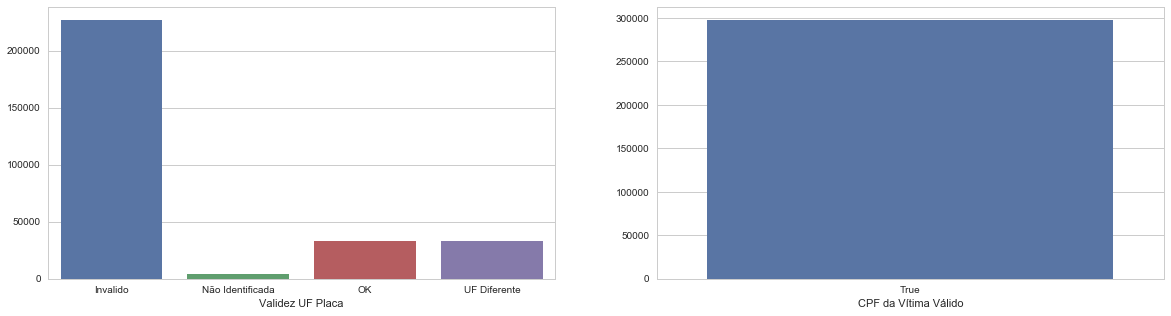

In [42]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))
a = df.groupby(['Validez UF Placa'])['Validez UF Placa'].size()
b = df.groupby(['CPF da Vítima Válido'])['CPF da Vítima Válido'].size()
sns.barplot(x=a.index, y=a.values, ax=axes[0])
sns.barplot(x=b.index, y=b.values, ax=axes[1])

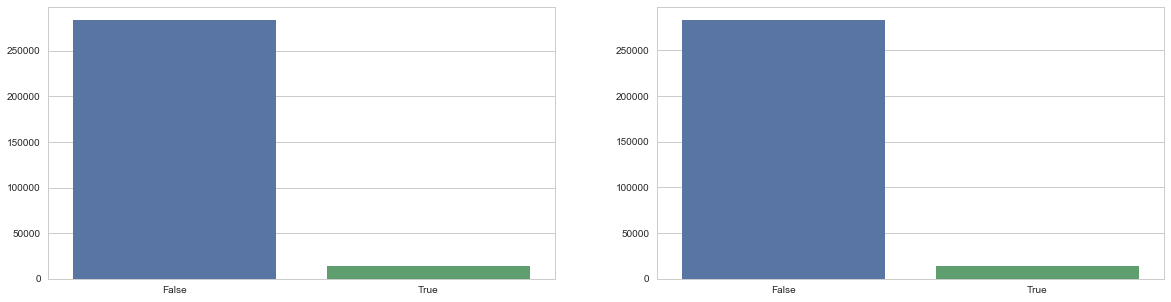

In [43]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))
a = df['Existe UF PREL != Sinistro'].value_counts()
b = df['Existe UF PREL != Delegacia'].value_counts()
sns.barplot(x=a.index, y=a.values, ax=axes[0])
sns.barplot(x=b.index, y=b.values, ax=axes[1])

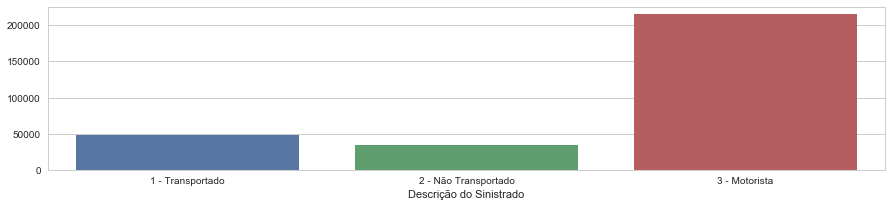

In [44]:
a = df.groupby('Descrição do Sinistrado').size()
plt.figure(figsize=(15, 3))
sns.barplot(x=a.index, y=a.values)

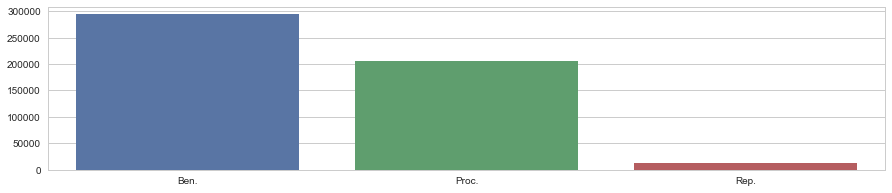

In [45]:
a = df['# Beneficiário'].sum()
b = df['# Procurador'].sum()
c = df['# Representante Legal'].sum()
plt.figure(figsize=(15, 3))
sns.barplot(x=['Ben.', 'Proc.', 'Rep.'], y=[a, b, c])

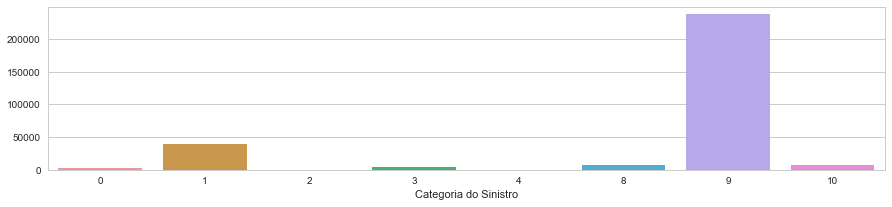

In [46]:
a = df.groupby('Categoria do Sinistro').size()
plt.figure(figsize=(15, 3))
sns.barplot(x=a.index, y=a.values)

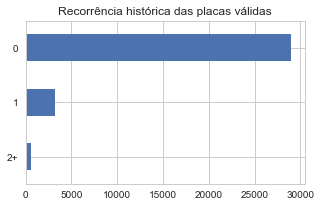

In [64]:
plt.figure(figsize=(5,3))
b = a.to_frame()
b.loc[b['# tot Placa'] > 1, '# tot Placa'] = 2
ax = b['# tot Placa'].value_counts()\
    .sort_index(ascending=False).plot.barh(title='Recorrência histórica das placas válidas')
ax.set_yticklabels(['2+',1,0])

In [65]:
a.value_counts().sort_index()

0.0     29028
1.0      3232
2.0       463
3.0        96
4.0        22
5.0         8
6.0        12
7.0         7
8.0         7
9.0         3
11.0        1
Name: # tot Placa, dtype: int64

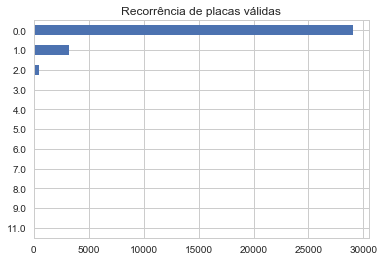

In [66]:
a.value_counts().sort_index(ascending=False).plot.barh(title='Recorrência de placas válidas')

In [67]:
a = df[(df['Validez UF Placa'] == 'OK')][['Placa', '# tot Placa']]
a = a.sort_values(by='# tot Placa', ascending=False).drop_duplicates()
a = a[:10]

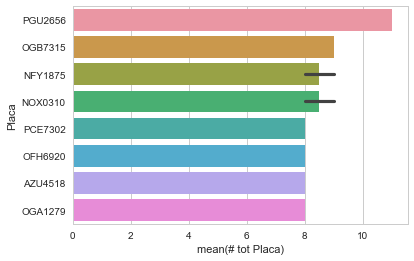

In [68]:
sns.barplot(y=a['Placa'], x=a['# tot Placa'])

In [121]:
a = df.sort_values(by=['# tot Placa'], ascending=False)
a[a['Validez UF Placa'] != 'OK']\
    [['Número do Sinistro', 'Data do Sinistro', 
      'Pleito Pretendido', 'Valor da Perícia', 'Max Valor Pago a Esta Pessoa',
      'Placa', '# tot Placa']].head(10)

,Número do Sinistro,Data do Sinistro,Pleito Pretendido,Valor da Perícia,Max Valor Pago a Esta Pessoa,Placa,# tot Placa
53891,3160640262,2016-08-23,13500.0,0.0,0.0,NNN0000,202.0
58079,3160655679,2016-08-17,13500.0,1350.0,1350.0,EZZ0000,123.0
55375,3160643724,2016-08-04,13500.0,5062.5,5062.5,EZZ0000,122.0
60909,3160663207,2016-07-02,NaN,NaN,0.0,EZZ0000,121.0
17433,3160497858,2016-06-01,NaN,NaN,0.0,EZZ0000,120.0
39254,3160589692,2016-07-08,NaN,NaN,0.0,AZZ0000,120.0
25940,3160542134,2016-05-19,13500.0,2362.5,2362.5,EZZ0000,119.0
31327,3160562403,2016-05-06,13500.0,0.0,0.0,EZZ0000,118.0
6026,3160427996,2016-04-30,NaN,NaN,0.0,EZZ0000,117.0
31397,3160562537,2016-04-28,13500.0,NaN,0.0,EZZ0000,116.0


In [132]:
a = df.sort_values(by=['# tot CRM do Médico'], ascending=False)
a[a['CRM Válido'] == 1]\
    [['Número do Sinistro', 'Data do Sinistro', 
      'Pleito Pretendido', 'Valor da Perícia', 'Max Valor Pago a Esta Pessoa',
      'CRM do Médico', 'UF do CRM do Médico', '# tot CRM do Médico']].head(10)

,Número do Sinistro,Data do Sinistro,Pleito Pretendido,Valor da Perícia,Max Valor Pago a Esta Pessoa,CRM do Médico,UF do CRM do Médico,# tot CRM do Médico
186358,3170230719,2017-04-02,NaN,NaN,0.00,11800.0,RS,1127.0
282340,3170451335,2017-03-31,NaN,NaN,0.00,11800.0,RS,1126.0
257413,3170396147,2017-03-01,13500.0,NaN,0.00,11800.0,RS,1125.0
257408,3170396142,2017-02-17,3375.0,843.75,843.75,11800.0,RS,1124.0
169876,3170191303,2017-02-06,13500.0,1687.50,1687.50,11800.0,RS,1123.0
207961,3170283728,2016-12-10,NaN,NaN,0.00,11800.0,RS,1121.0
115092,3170054300,2016-10-25,3375.0,1687.50,1687.50,11800.0,RS,1120.0
159353,3170166000,2016-09-06,13500.0,NaN,0.00,11800.0,RS,1119.0
46480,3160614411,2016-06-24,3375.0,1687.50,1687.50,11800.0,RS,1118.0
41170,3160596882,2016-06-19,13500.0,3037.50,3037.50,11800.0,RS,1117.0


### Telefone

In [70]:
df.sort_values(by=['# tot Telefone Beneficiário'], ascending=False)\
    [['Número do Sinistro', 'Data do Sinistro', 
      'Pleito Pretendido', 'Valor da Perícia', 'Max Valor Pago a Esta Pessoa',
      '# tot CPF/PF Beneficiário', '# tot CPF/PF Ñ Beneficiário',
      '# Relatorios', '# tot Sinistros CPF/PF Beneficiário',
      '# tot Telefone Beneficiário', '# tot Telefone Ñ Beneficiário', 
      '# distinct Pessoa Relacionada ao Sinistro', 'Placa']].head(10)

,Número do Sinistro,Data do Sinistro,Pleito Pretendido,Valor da Perícia,Max Valor Pago a Esta Pessoa,# tot CPF/PF Beneficiário,# tot CPF/PF Ñ Beneficiário,# Relatorios,# tot Sinistros CPF/PF Beneficiário,# tot Telefone Beneficiário,# tot Telefone Ñ Beneficiário,# distinct Pessoa Relacionada ao Sinistro,Placa
295955,3170479609,2017-08-12,NaN,NaN,0.0,0.0,467.0,NaN,1.0,1318.0,1318.0,2,NaN
292656,3170472691,2017-08-05,13500.0,NaN,0.0,0.0,466.0,NaN,1.0,1317.0,1317.0,2,NaN
292845,3170472991,2017-06-13,13500.0,NaN,0.0,0.0,802.0,NaN,1.0,1317.0,1317.0,2,NaN
292999,3170473452,2017-07-29,13500.0,NaN,0.0,0.0,464.0,NaN,1.0,1315.0,1315.0,2,NaN
291820,3170471295,2017-06-11,NaN,NaN,0.0,0.0,800.0,NaN,1.0,1315.0,1315.0,2,NaN
276235,3170438550,2017-06-06,13500.0,NaN,0.0,0.0,797.0,NaN,1.0,1312.0,1312.0,3,NaN
296005,3170479687,2017-06-06,NaN,NaN,0.0,0.0,797.0,NaN,1.0,1312.0,0.0,2,NaN
297640,3170484189,2017-07-16,NaN,NaN,0.0,0.0,460.0,NaN,1.0,1311.0,1311.0,2,NaN
292977,3170473422,2017-07-15,13500.0,NaN,0.0,0.0,56.0,NaN,1.0,1310.0,0.0,2,NaN
285117,3170456945,2017-05-29,NaN,NaN,0.0,0.0,793.0,NaN,1.0,1308.0,1308.0,2,NaN


In [71]:
df.sort_values(by=['# tot Telefone Ñ Beneficiário'], ascending=False)\
    [['Número do Sinistro', 'Data do Sinistro', 
      'Pleito Pretendido', 'Valor da Perícia', 'Max Valor Pago a Esta Pessoa',
      '# tot CPF/PF Beneficiário', '# tot CPF/PF Ñ Beneficiário',
      '# Relatorios', '# tot Sinistros CPF/PF Beneficiário',
      '# tot Telefone Beneficiário', '# tot Telefone Ñ Beneficiário', 
      '# distinct Pessoa Relacionada ao Sinistro', 'Placa']].head(10)

,Número do Sinistro,Data do Sinistro,Pleito Pretendido,Valor da Perícia,Max Valor Pago a Esta Pessoa,# tot CPF/PF Beneficiário,# tot CPF/PF Ñ Beneficiário,# Relatorios,# tot Sinistros CPF/PF Beneficiário,# tot Telefone Beneficiário,# tot Telefone Ñ Beneficiário,# distinct Pessoa Relacionada ao Sinistro,Placa
265981,3170415409,2017-06-25,NaN,NaN,0.0,0.0,806.0,NaN,1.0,0.0,1321.0,3,NaN
296049,3170479756,2017-06-22,NaN,NaN,0.0,0.0,805.0,NaN,1.0,0.0,1320.0,2,NaN
291668,3170470750,2017-06-17,13500.0,NaN,0.0,0.0,804.0,NaN,1.0,0.0,1319.0,2,NaN
297624,3170483935,2017-08-20,NaN,NaN,0.0,0.0,468.0,NaN,1.0,0.0,1319.0,2,NaN
291715,3170470823,2017-06-17,13500.0,NaN,0.0,0.0,804.0,NaN,1.0,0.0,1319.0,2,NaN
292959,3170473394,2017-06-17,NaN,NaN,0.0,0.0,804.0,NaN,1.0,0.0,1319.0,2,NaN
296007,3170479689,2017-06-15,NaN,NaN,0.0,0.0,803.0,NaN,1.0,0.0,1318.0,2,NaN
295955,3170479609,2017-08-12,NaN,NaN,0.0,0.0,467.0,NaN,1.0,1318.0,1318.0,2,NaN
291818,3170471291,2017-06-13,NaN,NaN,0.0,1.0,802.0,NaN,2.0,0.0,1317.0,2,NaN
292845,3170472991,2017-06-13,13500.0,NaN,0.0,0.0,802.0,NaN,1.0,1317.0,1317.0,2,NaN


### Notas:   

    - Quando a chave é do tipo *Ñ Beneficiário, é mais comum o pleito pretentido estar preenchido. Quando os dados dizem respeito ao beneficiário, o mesmo aparece como nulo na grande parte das tabelas obtidas, agrupadas por #.
    - Alguns top '# tot Placa' estão relacionados a grandes '# # tot CPF/PF Ñ Beneficiário', mas a recíproca não é verdadeira para os top '# tot Telefone' e '# tot CPF/PF'
    - Para todas top # analisadas, estas parecem estar relacionadas a um valor alto de pleito pretendido. Muitas vezes a % do valor pago é pequena em relação ao primeiro. 

## Localidade

In [72]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.collections import PatchCollection


def make_map(ax):
    m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=7,
                llcrnrlon=-77, urcrnrlon=-32, resolution='i', ax=ax)
    m.fillcontinents()
    return m

def drawstates(fig, ax, data, shapefile='../BRA_adm_shp/BRA_adm2'):
    shp = m.readshapefile(shapefile, 'states', drawbounds=False)
    
    norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())
    cmap = cm.hot_r
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
 
    for nshape, seg in enumerate(m.states):
        uf = m.states_info[nshape]['NAME_1']
        color  = sm.to_rgba(data[uf])
        poly = Polygon(seg, facecolor=color, edgecolor='k')
        ax.add_patch(poly)
        
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.8, pad=0.02)

In [73]:
map_dict = {'Acre':'AC',
            'Alagoas':'AL',
            'Amapá':'AP',
            'Amazonas':'AM',
            'Bahia':'BA',
            'Ceará':'CE',
            'Distrito Federal':'DF',
            'Espírito Santo':'ES', 
            'Goiás':'GO',
            'Maranhão':'MA',
            'Mato Grosso':'MT',
            'Mato Grosso do Sul':'MS', 
            'Minas Gerais':'MG',
            'Pará':'PA',
            'Paraíba':'PB',
            'Paraná':'PR', 
            'Pernambuco':'PE',
            'Piauí':'PI',
            'Rio de Janeiro':'RJ', 
            'Rio Grande do Norte':'RN',
            'Rio Grande do Sul':'RS',
            'Rondônia':'RO',
            'Roraima':'RR',
            'Santa Catarina':'SC', 
            'São Paulo':'SP',
            'Sergipe':'SE',
            'Tocantins':'TO'}

inv_map = {v: k for k, v in map_dict.items()}

In [74]:
inv_map = pd.DataFrame(inv_map, index=['UF']).T.reset_index()

In [75]:
m1 = df[['Município da Ocorrência do Sinistro', 
         'UF do Município da Ocorrência do Sinistro', 'Qtd Veiculos', 
         'Qtd Sinistros']].drop_duplicates()

In [76]:
m1 = df.groupby('UF do Município da Ocorrência do Sinistro')\
        .agg({'Qtd Veiculos': sum, 'Qtd Sinistros':sum}).reset_index()

In [77]:
m1 = m1.merge(inv_map, left_on='UF do Município da Ocorrência do Sinistro', 
              right_on='index')

In [78]:
m1 = m1.drop(['UF do Município da Ocorrência do Sinistro', 'index'], 
             axis=1).set_index('UF')

In [79]:
m1.head()

,Qtd Veiculos,Qtd Sinistros
UF,,
Acre,1.023900e+08,423140.0
Alagoas,3.159468e+08,1356493.0
Amazonas,1.790260e+09,8676592.0
Amapá,6.926596e+07,301083.0
Bahia,1.458676e+09,4238778.0


In [80]:
def drawstates(fig, ax, data, shapefile='../BRA_adm_shp/BRA_adm1'):
    shp = m.readshapefile(shapefile, 'states', drawbounds=False)
    
    norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())
    cmap = cm.hot_r
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
 
    for nshape, seg in enumerate(m.states):
        uf = m.states_info[nshape]['NAME_1']
        color  = sm.to_rgba(data[uf])
        poly = Polygon(seg, facecolor=color, edgecolor='k')
        ax.add_patch(poly)
        
    cb = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.8, pad=0.02)

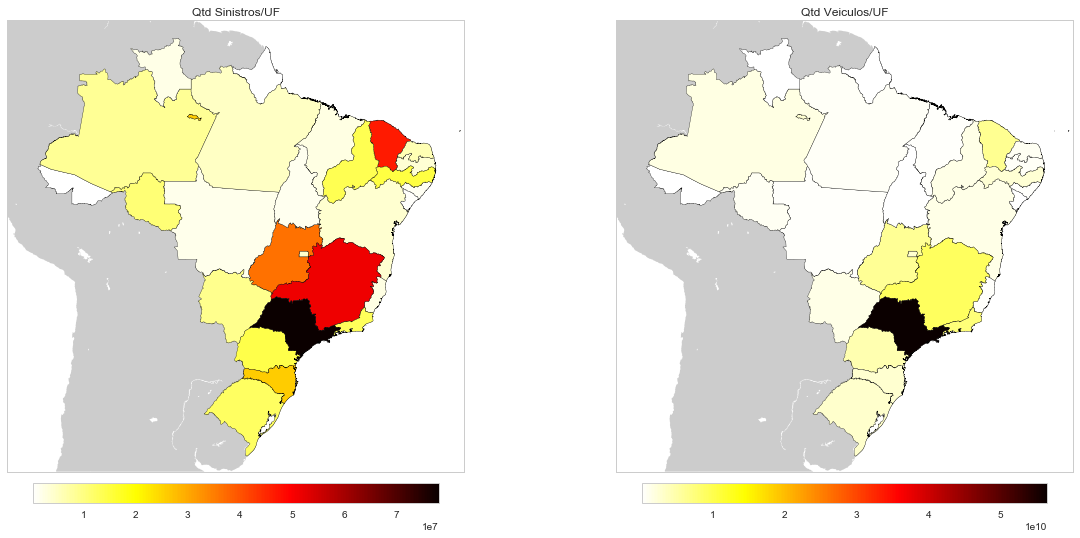

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
m = make_map(axes[0])
drawstates(fig, m.ax, m1['Qtd Sinistros'])
axes[0].set_title('Qtd Sinistros/UF')

m = make_map(axes[1])
drawstates(fig, m.ax, m1['Qtd Veiculos'])
axes[1].set_title('Qtd Veiculos/UF')

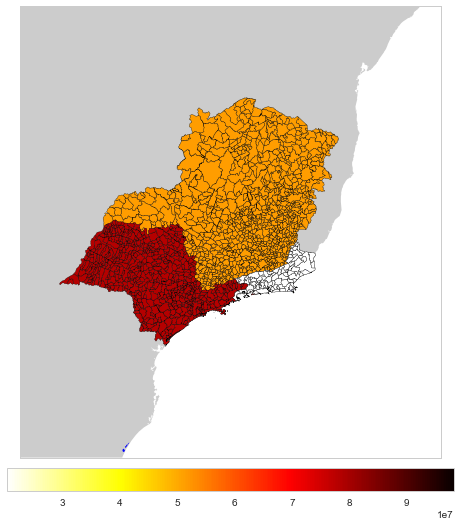

In [82]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='merc', llcrnrlat=-30, urcrnrlat=-10,
            llcrnrlon=-55, urcrnrlon=-35, resolution='i', ax=ax)
m.fillcontinents(lake_color='blue')

shapefile = '../BRA_adm_shp/BRA_adm2'
data = m1['Qtd Sinistros']
shp = m.readshapefile(shapefile, 'states', drawbounds=False)

norm = mpl.colors.Normalize(vmin=data.min()+20000000, vmax=data.max()+20000000)
cmap = cm.hot_r
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

for nshape, seg in enumerate(m.states):
    if m.states_info[nshape]['NAME_1'] in ['Minas Gerais','Rio de Janeiro',
                                           'São Paulo']:
        uf = m.states_info[nshape]['NAME_1']
        color = sm.to_rgba(data[uf])
        poly = Polygon(seg, facecolor=color, edgecolor='k')
        ax.add_patch(poly)

cb = fig.colorbar(sm, orientation='horizontal', ax=ax,
                  shrink=0.8, pad=0.02)

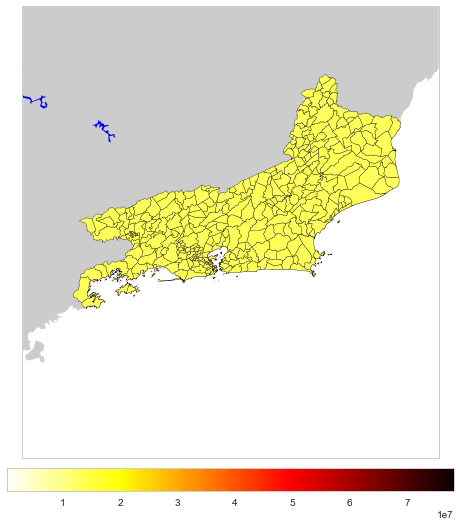

In [83]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='merc', llcrnrlat=-25, urcrnrlat=-20,
            llcrnrlon=-45.5, urcrnrlon=-40.5, resolution='i', ax=ax)
m.fillcontinents(lake_color='blue')

shapefile = '../BRA_adm_shp/BRA_adm3'
data = m1['Qtd Sinistros']
shp = m.readshapefile(shapefile, 'states', drawbounds=False)

norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())
cmap = cm.hot_r
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

for nshape, seg in enumerate(m.states):
    if m.states_info[nshape]['NAME_1'] == 'Rio de Janeiro':
        uf = m.states_info[nshape]['NAME_1']
        color = sm.to_rgba(data[uf])
        poly = Polygon(seg, facecolor=color, edgecolor='k')
        ax.add_patch(poly)

cb = fig.colorbar(sm, orientation='horizontal', ax=ax,
                  shrink=0.8, pad=0.02)

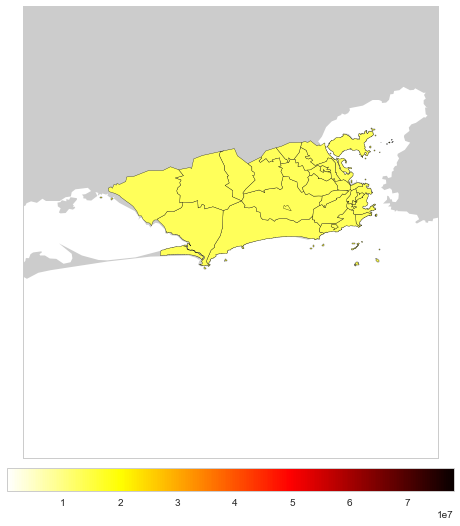

In [84]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='merc', llcrnrlat=-23.5, urcrnrlat=-22.5,
            llcrnrlon=-44, urcrnrlon=-43, resolution='h', ax=ax)
m.fillcontinents(lake_color='blue')

shapefile = '../BRA_adm_shp/BRA_adm3'
data = m1['Qtd Sinistros']
shp = m.readshapefile(shapefile, 'states', drawbounds=False)

norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())
cmap = cm.hot_r
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

for nshape, seg in enumerate(m.states):
    if m.states_info[nshape]['NAME_1'] == 'Rio de Janeiro' and\
        m.states_info[nshape]['NAME_2'] == 'Rio de Janeiro':
        uf = m.states_info[nshape]['NAME_1']
        color = sm.to_rgba(data[uf])
        poly = Polygon(seg, facecolor=color, edgecolor='k')
        ax.add_patch(poly)

cb = fig.colorbar(sm, orientation='horizontal', ax=ax,
                  shrink=0.8, pad=0.02)

## Análise das Features

In [93]:
df.columns[3:]

Index(['Hora do Sinistro', 'Seguradora/Reguladora', 'Pleito Pretendido',
       'Nome da Vítima', 'CPF da Vítima', 'Sexo da Vítima',
       'Descrição do Sinistrado', 'Categoria do Sinistro', 'Tipo do Documento',
       'Nome do Médico', 'CRM do Médico',
       'Município da Ocorrência do Sinistro',
       'UF do Município da Ocorrência do Sinistro', 'UF do CRM do Médico',
       'Valor da Perícia', 'Valor de AMD', 'Placa', 'UF da Placa',
       'CPF da Vítima Válido', 'Idade da Vítima', '# Relatorios',
       '# Medico examinador', '# Prestador', '# Com sequela', '# Sem sequela',
       '# Em tratamento', '# Não definido', '# Sequela não indenizável',
       'Avg % de perda', 'Std % de perda', 'Avg % apurado', 'Std % apurado',
       'Avg Indenização pelo dano', 'Std Indenização pelo dano', '# tot Placa',
       '# tot CPF/Vítima', 'DT Reclamação-Sinistro', 'DT Boletim-Sinistro',
       'DT Perícia-Sinistro', 'DT Data de Realização da AMD-Sinistro',
       'Tem RelatórioPM', '# Pessoa

In [94]:
import math
info_value = pd.DataFrame(columns=['Information Value'])
cols = ['Idade da Vítima', '# Relatorios',
         '# distinct Pessoa Relacionada ao Sinistro','# Procurador', 
         '# Representante Legal',
         '# Parentes Relacionados ao Sinistro','# CPF CNPJ Inválido',
         '# tot Telefone Ñ Beneficiário', '# tot Telefone Beneficiário',
         '# tot Conta Ñ Beneficiário', '# tot Conta Beneficiário',
         '# tot CRM do Médico', '# tot CNPJ Ñ Beneficiário',
         '# tot CNPJ Beneficiário', '# tot CPF/PF Ñ Beneficiário',
         'DT Reclamação-Sinistro', 'DT Boletim-Sinistro',
         '# tot CPF/PF Beneficiário','Proporção']
for colname in cols:
    df[colname].fillna(0, inplace=True)
    a = pd.pivot_table(df, values='Número do Sinistro', dropna=False, #margins=True,
                index=colname, columns='Marcação', aggfunc=len)
                  #,margins_name='Total')

    a['DSF'] = a['SEM FRAUDE']/a['SEM FRAUDE'].sum()
    a['DFR'] = a['FRAUDE']/a['FRAUDE'].sum()
    a['DSF-DFR'] = a['DSF'] - a['DFR']
    a['WOE'] = np.log(a['DSF'] / a['DFR'])
    a['(DSF-DFR)*WOE'] = a['DSF-DFR'] * a['WOE']
    #a.loc['Total', :] = a.sum(numeric_only=True)
    info_value.loc[colname] = [a['(DSF-DFR)*WOE'].sum()]
    
info_value.sort_values('Information Value', ascending=False)

,Information Value
# Relatorios,1.462820
# tot CPF/PF Ñ Beneficiário,0.554657
Proporção,0.548740
# Procurador,0.362009
# distinct Pessoa Relacionada ao Sinistro,0.299827
# tot Telefone Ñ Beneficiário,0.299318
DT Reclamação-Sinistro,0.232383
DT Boletim-Sinistro,0.179720
# tot CRM do Médico,0.125823
# tot Telefone Beneficiário,0.094256


In [95]:
df['# Relatorios'].value_counts()

0.0    155862
1.0    124154
2.0     16054
3.0      1411
4.0       161
5.0        26
6.0         2
Name: # Relatorios, dtype: int64

In [96]:
colname = '# Prestador'
df[colname].fillna(0, inplace=True)
a = pd.pivot_table(df, values='Número do Sinistro', dropna=False, #margins=True,
            index=colname, columns='Marcação', aggfunc=len)
              #,margins_name='Total')

a['DFR'] = a['FRAUDE']/a['FRAUDE'].sum()
a['DSF'] = a['SEM FRAUDE']/a['SEM FRAUDE'].sum()
a['DSF-DFR'] = a['DSF'] - a['DFR']
a['WOE'] = np.log(a['DSF'] / a['DFR'])
a['(DSF-DFR)*WOE'] = a['DSF-DFR'] * a['WOE']
a.loc['Total', :] = a.sum(numeric_only=True)
a

Marcação,FRAUDE,SEM FRAUDE,DFR,DSF,DSF-DFR,WOE,(DSF-DFR)*WOE
# Prestador,,,,,,,
0.0,1389.0,2527.0,0.963914,0.503687,-0.460226,-0.649046,0.298708
1.0,52.0,2490.0,0.036086,0.496313,0.460226,2.621299,1.206391
Total,1441.0,5017.0,1.000000,1.000000,0.000000,1.972253,1.505100


In [97]:
df['UF Placa/Sequencia'].value_counts(dropna=False)

NaN         256202
MG            5906
SP            5051
Invalido      4273
RS            3287
CE            3231
SC            2383
PE            2245
PR            2126
RO            1672
GO            1646
PA            1150
PI             950
PB             871
MA             845
MT             811
RN             688
ES             679
RJ             668
BA             666
MS             469
DF             390
AM             381
TO             306
AL             266
SE             192
AC             147
RR             101
AP              68
Name: UF Placa/Sequencia, dtype: int64

In [98]:
featureNamesDict = {'Idade da Vítima': 'Idade da Vítima',
            '# Relatorios': 'Quantidade de Relatórios',
            '# distinct Pessoa Relacionada ao Sinistro': 'Quantidade de Pessoas Distintas',
            '# Procurador': 'Quantidade de Procuradores',
            '# Representante Legal': 'Quantidade de Representantes Legais',
            '# Parentes Relacionados ao Sinistro': 'Quantidade de Parentes',
            '# CPF CNPJ Inválido': 'Quantidade de CPF ou CNPJ Inválido',
            '# tot Telefone Ñ Beneficiário': 'Recorrência do Telefone do Não-Beneficiário',
            '# tot Telefone Beneficiário': 'Recorrência do Telefone do Beneficiário',
            '# tot Conta Ñ Beneficiário': 'Recorrência da Conta do Não-Beneficiário',
            '# tot Conta Beneficiário': 'Recorrência da Conta do Beneficiário',
            '# tot CRM do Médico': 'Recorrência do CRM do Médico',
            '# tot CNPJ Ñ Beneficiário': 'Recorrência da CNPJ do Não-Beneficiário',
            '# tot CNPJ Beneficiário': 'Recorrência da CNPJ do Beneficiário',
            '# tot CPF/PF Ñ Beneficiário': 'Recorrência do CPF do Não-Beneficiário',
            '# tot CPF/PF Beneficiário': 'Recorrência do CPF do Beneficiário',
            'DT Reclamação-Sinistro': 'Intervalo entre data de Reclamação e do Sinistro',
            'DT Boletim-Sinistro': 'Intervalo entre data de Boletim e do Sinistro',
            'Proporção': 'Proporção de Sinistros por Frota'}

In [99]:
len(featureNamesDict)

19

In [100]:
df.columns

Index(['Número do Sinistro', 'ATVCOD', 'Data do Sinistro', 'Hora do Sinistro',
       'Seguradora/Reguladora', 'Pleito Pretendido', 'Nome da Vítima',
       'CPF da Vítima', 'Sexo da Vítima', 'Descrição do Sinistrado',
       'Categoria do Sinistro', 'Tipo do Documento', 'Nome do Médico',
       'CRM do Médico', 'Município da Ocorrência do Sinistro',
       'UF do Município da Ocorrência do Sinistro', 'UF do CRM do Médico',
       'Valor da Perícia', 'Valor de AMD', 'Placa', 'UF da Placa',
       'CPF da Vítima Válido', 'Idade da Vítima', '# Relatorios',
       '# Medico examinador', '# Prestador', '# Com sequela', '# Sem sequela',
       '# Em tratamento', '# Não definido', '# Sequela não indenizável',
       'Avg % de perda', 'Std % de perda', 'Avg % apurado', 'Std % apurado',
       'Avg Indenização pelo dano', 'Std Indenização pelo dano', '# tot Placa',
       '# tot CPF/Vítima', 'DT Reclamação-Sinistro', 'DT Boletim-Sinistro',
       'DT Perícia-Sinistro', 'DT Data de Realização d

In [101]:
df['# tot Conta Ñ Beneficiário'].value_counts(dropna=False)

0.0     297269
1.0        371
2.0         24
3.0          3
4.0          2
16.0         1
Name: # tot Conta Ñ Beneficiário, dtype: int64

In [102]:
df[df['# tot Conta Ñ Beneficiário'].isnull()]['# Procurador'].value_counts(dropna=False)

Series([], Name: # Procurador, dtype: int64)

In [103]:
df[df['# Procurador'] > 0]['# tot Conta Ñ Beneficiário'].value_counts(dropna=False)

0.0     205006
1.0        301
2.0         22
3.0          3
4.0          2
16.0         1
Name: # tot Conta Ñ Beneficiário, dtype: int64

In [104]:
bins = [-1,0,1,2,3,4,5,10,50,100,2000]
group_names = ['0','1','2','3','4','5','6-10','10-50','50-100','100+']

df['# tot Telefone Beneficiário bins'] = pd.cut(df['# tot Telefone Beneficiário'], 
                                        bins, labels=group_names)
df['# tot Telefone Beneficiário bins'].value_counts()

0         237233
100+       29664
10-50      10678
1           6109
50-100      5975
6-10        3221
2           1703
3           1197
4           1032
5            858
Name: # tot Telefone Beneficiário bins, dtype: int64

In [105]:
df['# tot Telefone Beneficiário bins'] = df['# tot Telefone Beneficiário bins'].astype(str)

In [113]:
df_fraudes = df[df['Marcação'] == 'FRAUDE']
df_legitimo = df[df['Marcação'] == 'SEM FRAUDE']
df_unknown = df[df['Marcação'].isnull()]

colname = 'CRM Válido'

d1 = df_fraudes[colname].fillna('NA').value_counts(dropna=False)
d2 = df_legitimo[colname].fillna('NA').value_counts(dropna=False)
d3 = df_unknown[colname].fillna('NA').value_counts(dropna=False)

d4 = pd.concat([d1, d2, d3], ignore_index=True, axis=1)
d4.fillna(0, inplace=True)
d4 = d4.rename(columns={0:'F', 1:'L', 2:'U'})
d4['Total'] = d4.sum(axis=1)
d4.loc['Total']= d4.sum()
d4['F %'] = ((d4['F'] / d4['F']['Total']) * 100).map('{:,.2f}'.format)
d4['L %'] = ((d4['L'] / d4['L']['Total']) * 100).map('{:,.2f}'.format)
d4['U %'] = ((d4['U'] / d4['U']['Total']) * 100).map('{:,.2f}'.format)
d4

,F,L,U,Total,F %,L %,U %
False,1081,3775,232780,237636,75.02,75.24,79.93
True,360,1242,58432,60034,24.98,24.76,20.07
Total,1441,5017,291212,297670,100.00,100.00,100.00


In [114]:
a = d4.iloc[:len(d4)-1,4:7].astype(float)
a['F % accum'] = np.cumsum(a['F %'])
a['L % accum'] = np.cumsum(a['L %'])
a['U % accum'] = np.cumsum(a['U %'])
a = a.transpose()
a

,False,True
F %,75.02,24.98
L %,75.24,24.76
U %,79.93,20.07
F % accum,75.02,100.00
L % accum,75.24,100.00
U % accum,79.93,100.00


In [115]:
df[df['# tot CRM do Médico'] != 0]['# Relatorios'].value_counts(normalize=False)

0.0    58286
1.0    46215
2.0     5601
3.0      454
4.0       62
5.0       11
Name: # Relatorios, dtype: int64

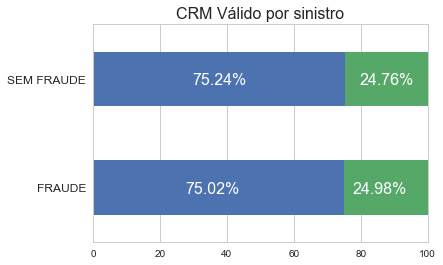

In [116]:
fontSize = 16
plt.figure(figsize=(8,5))
ax = a.loc[['F %','L %']].plot(kind='barh', stacked=True, legend=False)
ax.set_yticklabels(['FRAUDE','SEM FRAUDE'], fontsize=12)
ax.set_xlim(0,100)
try:
    plt.title(featureNamesDict[colname] + ' por sinistro', fontsize=16)
except:
    plt.title(colname + ' por sinistro', fontsize=16)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for i,e in enumerate(a.loc['F %']):
    if e > 5:
        ax.annotate(str(e)+'%', 
                    xy=(a.loc['F % accum'].iloc[i] - e + e/2-10, 0-0.05), 
                    color='white', 
                    fontsize=fontSize)
        
for i,e in enumerate(a.loc['L %']):
    if e > 5:
        ax.annotate(str(e)+'%', 
                    xy=(a.loc['L % accum'].iloc[i] - e + e/2-8, 1-0.05), 
                    color='white', 
                    fontsize=fontSize)

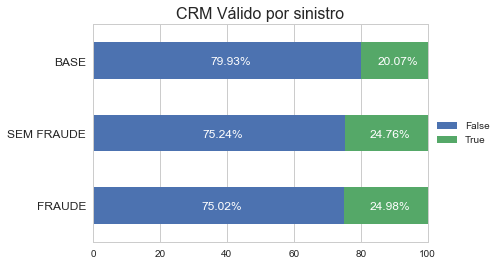

In [117]:
fontSize = 12
displayThreshold = 7
plt.figure(figsize=(8,5))
ax = a.loc[['F %','L %','U %']].plot(kind='barh', stacked=True, legend=False)
ax.set_yticklabels(['FRAUDE','SEM FRAUDE','BASE'], fontsize=12)
ax.set_xlim(0,100)
try:
    plt.title(featureNamesDict[colname] + ' por sinistro', fontsize=16)
except:
    plt.title(colname + ' por sinistro', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for i,e in enumerate(a.loc['F %']):
    if e > displayThreshold:
        ax.annotate(str(e)+'%', 
                    xy=(a.loc['F % accum'].iloc[i] - e + e/2-5, 0-0.05), 
                    color='white', 
                    fontsize=fontSize)
        
for i,e in enumerate(a.loc['L %']):
    if e > displayThreshold:
        ax.annotate(str(e)+'%', 
                    xy=(a.loc['L % accum'].iloc[i] - e + e/2-5, 1-0.05), 
                    color='white', 
                    fontsize=fontSize)
        
for i,e in enumerate(a.loc['U %']):
    if e > displayThreshold:
        ax.annotate(str(e)+'%', 
                    xy=(a.loc['U % accum'].iloc[i] - e + e/2-5, 2-0.05), 
                    color='white', 
                    fontsize=fontSize)

In [112]:
a.head()

,0.0,1.0,2.0,3.0,4.0,16.0
F %,99.31,0.56,0.14,0.00,0.00,0.00
L %,99.58,0.42,0.00,0.00,0.00,0.00
U %,99.87,0.12,0.01,0.00,0.00,0.00
F % accum,99.31,99.87,100.01,100.01,100.01,100.01
L % accum,99.58,100.00,100.00,100.00,100.00,100.00


## Correlação

In [114]:
s = len(df)
df.dropna(thresh=s-(0.8*s), axis=1, inplace=True)

In [115]:
df.drop(['Nome da Vítima', 'Sexo da Vítima', 'Descrição do Sinistrado', 'Nome do Médico', 'Número do Sinistro',
         'CRM do Médico', 'UF do CRM do Médico', 'UF da Placa', 'Placa', 'CPF da Vítima',
         'Município da Ocorrência do Sinistro', 'ATVCOD'], inplace=True, axis=1)

In [116]:
df.columns[df.isnull().any()]

Index(['Pleito Pretendido', 'Valor da Perícia', 'Valor de AMD',
       '# Medico examinador', '# Com sequela', '# Sem sequela',
       '# Em tratamento', '# Não definido', '# Sequela não indenizável',
       'DT Perícia-Sinistro', 'DT Data de Realização da AMD-Sinistro',
       'Max Valor Pago a Esta Pessoa', '# tot Sinistros CPF/PF Ñ Beneficiário',
       '# tot Sinistros CPF/PF Beneficiário', 'Qtd Sinistros', 'Qtd Veiculos'],
      dtype='object')

In [117]:
df.fillna(0, inplace=True)

### Geral

In [118]:
ds = df.sample(frac=0.22)

In [119]:
len(ds)

65487

In [120]:
num = ds.select_dtypes(['number'])

In [121]:
num = num[num.columns.difference(['Categoria do Sinistro'])]

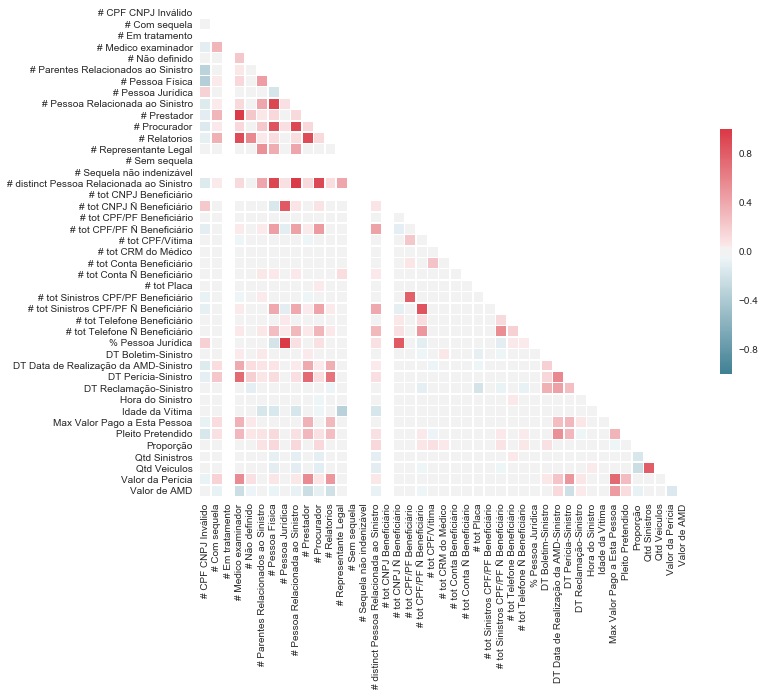

In [122]:
sns.set(style="white")

corr = num.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})#, annot=True, fmt='.1f')

In [123]:
indices = np.where(abs(corr) > 0.8)
indices = [(corr.index[x], corr.columns[y], corr.iloc[x, y]) 
           for x, y in zip(*indices) if x != y and x < y]

In [124]:
for i in indices:
    print(i)

('# Medico examinador', '# Prestador', 1.0)
('# Medico examinador', '# Relatorios', 0.90598521203436366)
('# Pessoa Física', '# Pessoa Relacionada ao Sinistro', 0.93619134536730908)
('# Pessoa Física', '# Procurador', 0.86260893369005953)
('# Pessoa Física', '# distinct Pessoa Relacionada ao Sinistro', 0.93597663805623665)
('# Pessoa Jurídica', '# tot CNPJ Ñ Beneficiário', 0.83508011541260108)
('# Pessoa Jurídica', '% Pessoa Jurídica', 0.99726779165581336)
('# Pessoa Relacionada ao Sinistro', '# Procurador', 0.91914143944674465)
('# Pessoa Relacionada ao Sinistro', '# distinct Pessoa Relacionada ao Sinistro', 0.99956136909668769)
('# Prestador', '# Relatorios', 0.90598521203436366)
('# Procurador', '# distinct Pessoa Relacionada ao Sinistro', 0.91916793841367284)
('# tot CNPJ Ñ Beneficiário', '% Pessoa Jurídica', 0.83287438409242909)
('# tot CPF/PF Ñ Beneficiário', '# tot Sinistros CPF/PF Ñ Beneficiário', 0.85291681596201041)


In [125]:
cat = ds.select_dtypes(['object'])

In [126]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for c in list(cat.columns.values):
    cat[c].fillna('UNK', inplace=True)
    cat[c] = le.fit_transform(cat[c].astype(str))

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


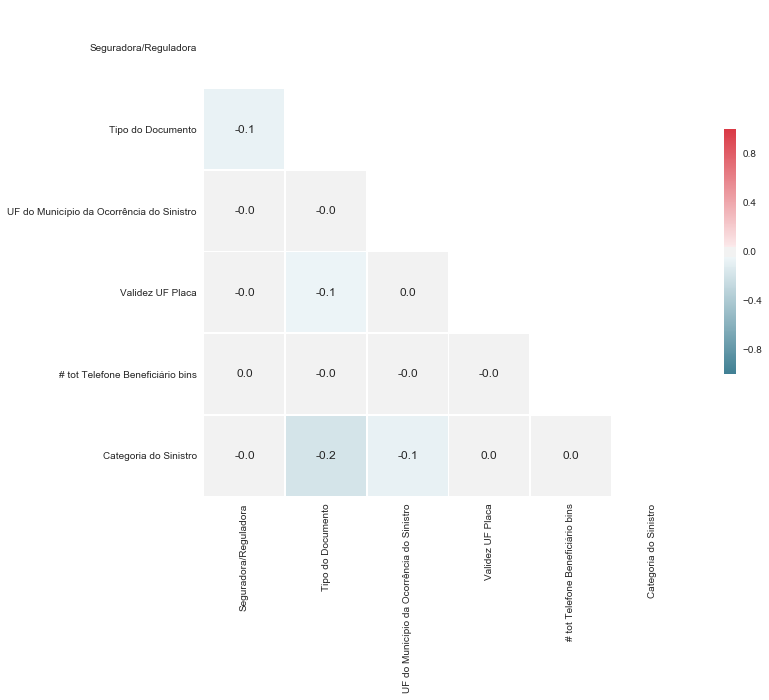

In [127]:
cat = pd.concat([cat, ds['Categoria do Sinistro']], axis=1)
corr = cat.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

### Procurador

In [128]:
ds = df[df['# Procurador'] > 0]

In [129]:
ds = ds.sample(frac=0.22)

In [130]:
len(ds)

45174

In [131]:
num = ds.select_dtypes(['number'])

In [132]:
num = num[num.columns.difference(['Categoria do Sinistro'])]

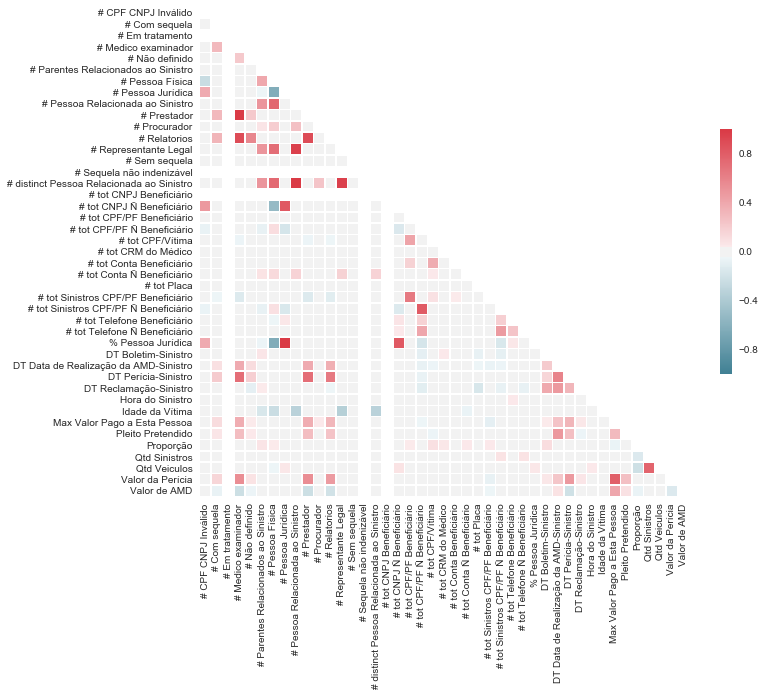

In [133]:
sns.set(style="white")

corr = num.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})#, annot=True, fmt='.1f')

In [134]:
indices = np.where(abs(corr) > 0.8)
indices = [(corr.index[x], corr.columns[y], corr.iloc[x, y]) for x, y in zip(*indices) if x != y and x < y]

In [135]:
for i in indices:
    print(i)

('# Medico examinador', '# Prestador', 1.0)
('# Medico examinador', '# Relatorios', 0.89879353371426707)
('# Pessoa Jurídica', '# tot CNPJ Ñ Beneficiário', 0.83395477420370723)
('# Pessoa Jurídica', '% Pessoa Jurídica', 0.99737334808372446)
('# Pessoa Relacionada ao Sinistro', '# Representante Legal', 0.96255825295470154)
('# Pessoa Relacionada ao Sinistro', '# distinct Pessoa Relacionada ao Sinistro', 0.99587646347140601)
('# Prestador', '# Relatorios', 0.89879353371426707)
('# Representante Legal', '# distinct Pessoa Relacionada ao Sinistro', 0.96178504212569782)
('# tot CNPJ Ñ Beneficiário', '% Pessoa Jurídica', 0.83050504820476678)
('# tot CPF/PF Ñ Beneficiário', '# tot Sinistros CPF/PF Ñ Beneficiário', 0.81708647547761504)


In [136]:
cat = ds.select_dtypes(['object'])

In [137]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for c in list(cat.columns.values):
    cat[c].fillna('UNK', inplace=True)
    cat[c] = le.fit_transform(cat[c].astype(str))

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


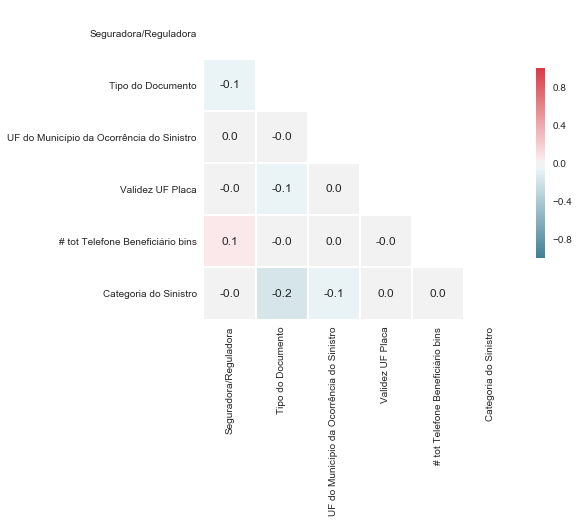

In [138]:
cat = pd.concat([cat, ds['Categoria do Sinistro']], axis=1)
corr = cat.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

### Não-Procurador

In [139]:
ds = df[df['# Procurador'] == 0]

In [140]:
ds = ds.sample(frac=0.22)

In [141]:
len(ds)

20314

In [142]:
num = ds.select_dtypes(['number'])

In [143]:
num = num[num.columns.difference(['Categoria do Sinistro'])]

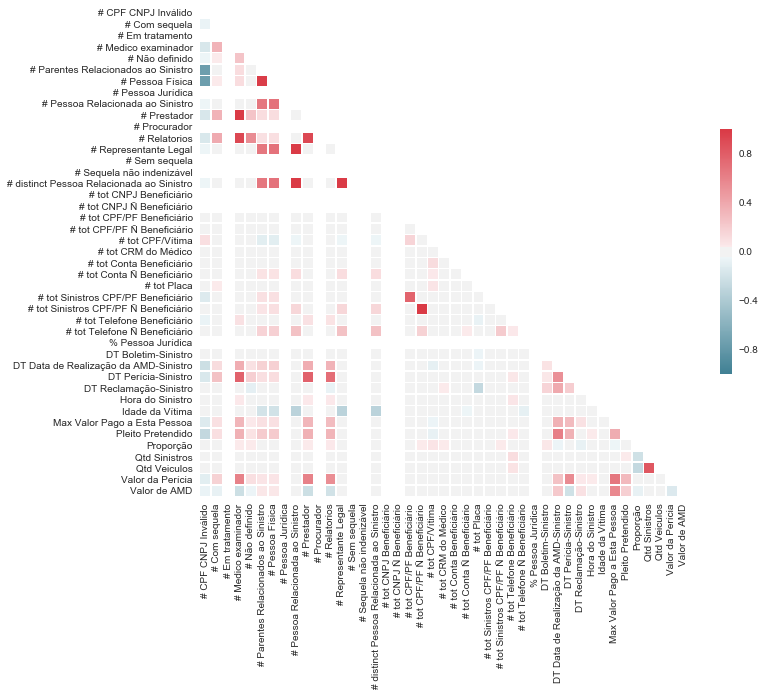

In [144]:
sns.set(style="white")

corr = num.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})#, annot=True, fmt='.1f')

In [145]:
indices = np.where(abs(corr) > 0.8)
indices = [(corr.index[x], corr.columns[y], corr.iloc[x, y]) for x, y in zip(*indices) if x != y and x < y]

In [146]:
for i in indices:
    print(i)

('# Medico examinador', '# Prestador', 1.0)
('# Medico examinador', '# Relatorios', 0.9216605440240665)
('# Parentes Relacionados ao Sinistro', '# Pessoa Física', 0.97869675648875687)
('# Pessoa Relacionada ao Sinistro', '# Representante Legal', 1.0)
('# Pessoa Relacionada ao Sinistro', '# distinct Pessoa Relacionada ao Sinistro', 1.0)
('# Prestador', '# Relatorios', 0.9216605440240665)
('# Representante Legal', '# distinct Pessoa Relacionada ao Sinistro', 1.0)
('# tot CPF/PF Ñ Beneficiário', '# tot Sinistros CPF/PF Ñ Beneficiário', 0.99270874548428256)
('Qtd Sinistros', 'Qtd Veiculos', 0.84074725507998938)


In [147]:
cat = ds.select_dtypes(['object'])

In [148]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for c in list(cat.columns.values):
    cat[c].fillna('UNK', inplace=True)
    cat[c] = le.fit_transform(cat[c].astype(str))

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


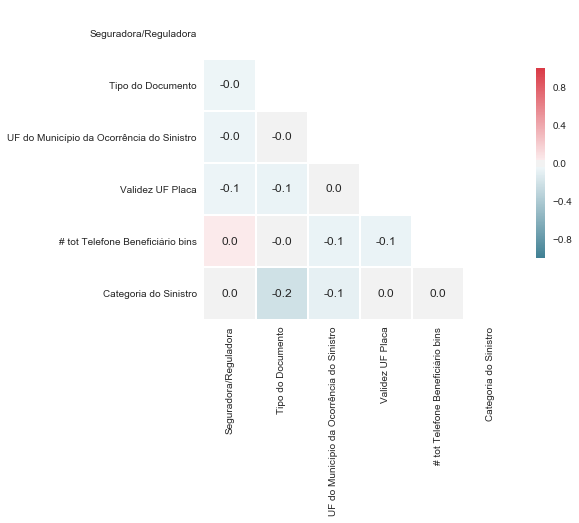

In [149]:
cat = pd.concat([cat, ds['Categoria do Sinistro']], axis=1)
corr = cat.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')